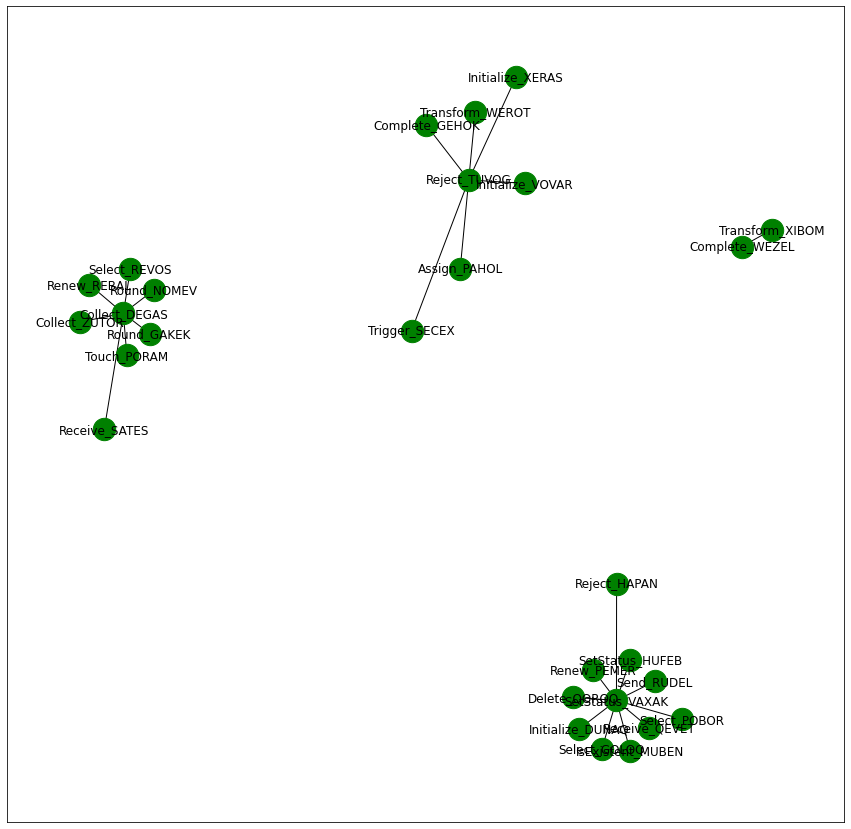

TypeError: float() argument must be a string or a number, not 'dict'

In [64]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sknetwork as sk

plt.rcParams['figure.figsize'] = [15, 15]

file = pd.ExcelFile('data.xlsx')
data = pd.read_excel(file, sheet_name=None)

callerCallee = data['CallerCallee']
commonChanges = data['CommonChanges']

cols = commonChanges.columns
edges = []
# len(commonChanges)
for i in range(0, 25):
    #, {'weight': 1 / commonChanges['NumberOfCommonChanges'][i]}
    edges.append((commonChanges['Service1'][i], commonChanges['Service2'][i]))

M = nx.MultiDiGraph()
M.add_edges_from(edges)

G = nx.Graph()

for u,v in M.edges():
    if G.has_edge(u,v):
        # print(G[u][v]['weight']['weight'], M.get_edge_data(u,v)[0]['weight'])
        G[u][v]['weight'] = (G[u][v]['weight'] + M.get_edge_data(u,v)[0]['weight']) / 2
    else:
        G.add_edge(u, v, weight = M.get_edge_data(u,v)[0]['weight'])

pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, cmap=plt.get_cmap('jet'),
                       node_color = 'green', node_size = 500)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos, edgelist=G.edges())
plt.show()

#pos2 = nx.spring_layout(M)
#nx.draw_networkx_nodes(M, pos2, cmap=plt.get_cmap('jet'),
#                       node_color = 'green', node_size = 500)
#nx.draw_networkx_labels(M, pos2)
#nx.draw_networkx_edges(M, pos2, edgelist=M.edges())
#plt.show()

# paris = sk.hierarchy.Paris()
graph = sk.data.convert_edge_list(edges)
print(graph)
adjacency = graph.adjacency

# dendrogram = paris.fit_transform(adjacency)

# test = np.round(dendrogram, 2)

# clustering = nx.clustering(G, weight='weight')